In [17]:
import xarray
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

# Open h5 file here.

In [18]:
dat = '20190915'
base_date = pd.Timestamp('2019-09-15')
#daystr = 'day1'


In [19]:
ds_nav = xarray.open_dataset(f'/home/svisaga/MUSICA_ANALYSES/WWW-AIR_1726704979598/CAMP2EX-HSRL2_P3B_{dat}_R0.h5', engine='h5netcdf', 
                             phony_dims='access', group='Nav_Data')

base_jday = ds_nav['Jday'][:,0].values[0]

# Calculate the difference in days from the base Julian Day
day_deltas = ds_nav['Jday'][:,0].values - base_jday

# Convert GPS times in hours to timedeltas
time_deltas = pd.to_timedelta(ds_nav['gps_time'][:,0].values, unit='h')

# Create datetime objects by adding the day deltas to the base date
dates = base_date + pd.to_timedelta(day_deltas, unit='D')

# Add the time deltas to the dates
date_times = dates + time_deltas

# Format the dates to YY-MM-DD
formatted_dates = date_times.strftime('%Y-%m-%d %H:%M:%S')


# Create a new xarray DataArray
ds_nav['Date'] = xarray.DataArray(
    formatted_dates,
    dims=["time"]
)



In [20]:
ds_nav

<xarray.Dataset>
Dimensions:               (phony_dim_1: 2721, phony_dim_2: 1, time: 2721)
Coordinates:
  * time                  (time) object '2019-09-15 21:56:06' ... '2019-09-16...
Dimensions without coordinates: phony_dim_1, phony_dim_2
Data variables: (12/36)
    Jday                  (phony_dim_1, phony_dim_2) float64 ...
    ambient_temp          (phony_dim_1, phony_dim_2) float64 ...
    angle_of_attack       (phony_dim_1, phony_dim_2) float64 ...
    cabin_press           (phony_dim_1, phony_dim_2) float64 ...
    dew_point             (phony_dim_1, phony_dim_2) float64 ...
    drift                 (phony_dim_1, phony_dim_2) float64 ...
    ...                    ...
    vert_velocity         (phony_dim_1, phony_dim_2) float64 ...
    vert_wind_speed       (phony_dim_1, phony_dim_2) float64 ...
    wgs_alt               (phony_dim_1, phony_dim_2) float64 ...
    wind_direction        (phony_dim_1, phony_dim_2) float64 ...
    wind_speed            (phony_dim_1, phony_dim_2) float64 ...
    Date                  (time) object '2019-09-15 21:56:06' ... '2019-09-16...

In [21]:
df_nav = ds_nav['Date'].to_dataframe().reset_index()
df_nav['time'] = pd.to_datetime(df_nav['time'])
df_nav

,time,Date
0,2019-09-15 21:56:06,2019-09-15 21:56:06
1,2019-09-15 21:56:16,2019-09-15 21:56:16
2,2019-09-15 21:56:26,2019-09-15 21:56:26
3,2019-09-15 21:56:36,2019-09-15 21:56:36
4,2019-09-15 21:56:46,2019-09-15 21:56:46
...,...,...
2716,2019-09-16 05:32:18,2019-09-16 05:32:18
2717,2019-09-16 05:32:28,2019-09-16 05:32:28
2718,2019-09-16 05:32:38,2019-09-16 05:32:38
2719,2019-09-16 05:32:48,2019-09-16 05:32:48


In [22]:
dat = '20190915'
dat1 = '2019-09-15-03600'
dat2 = '2019-09-16-03600'
workdir = '/home/svisaga/MUSICA_ANALYSES/WWW-AIR_1726704979598/'
p3file = f'CAMP2Ex-mrg01-P3B-NC_merge_{dat}_R3.nc'
p3data_ds = xarray.open_dataset(workdir+p3file)

variables = ['AOT532_hi']
selected_data = p3data_ds[variables]
p3data = selected_data.to_dataframe().reset_index()
#p3data = p3data.dropna(subset=['lon', 'lat', 'AOT532_hi'])
#p3data = p3data[p3data['AOT532_hi'] > 1.5]

p3data['time'] = pd.to_datetime(p3data['time'].dt.strftime("%Y-%m-%d %H:%M:%S"))
p3data.dtypes

time         datetime64[ns]
AOT532_hi           float32
lat                 float32
lon                 float32
alt                 float32
dtype: object

In [23]:
df_nav_ = pd.merge(df_nav, p3data, on='time', how='inner')
df_nav_

,time,Date,AOT532_hi,lat,lon,alt
0,2019-09-15 21:56:06,2019-09-15 21:56:06,NaN,15.177249,120.559052,180.100006
1,2019-09-15 21:56:16,2019-09-15 21:56:16,NaN,15.170413,120.556412,225.899994
2,2019-09-15 21:56:26,2019-09-15 21:56:26,NaN,15.163334,120.553856,272.399994
3,2019-09-15 21:56:36,2019-09-15 21:56:36,NaN,15.156045,120.551460,326.000000
4,2019-09-15 21:56:46,2019-09-15 21:56:46,NaN,15.148691,120.549034,382.299988
...,...,...,...,...,...,...
2716,2019-09-16 05:32:18,2019-09-16 05:32:18,NaN,15.079492,120.751846,1627.400024
2717,2019-09-16 05:32:28,2019-09-16 05:32:28,NaN,15.090205,120.750603,1613.900024
2718,2019-09-16 05:32:38,2019-09-16 05:32:38,NaN,15.101133,120.749268,1610.099976
2719,2019-09-16 05:32:48,2019-09-16 05:32:48,NaN,15.112211,120.747917,1613.599976


In [24]:
# Open the HDF5 file using the h5netcdf engine
ds = xarray.open_dataset(f'/home/svisaga/MUSICA_ANALYSES/WWW-AIR_1726704979598/CAMP2EX-HSRL2_P3B_{dat}_R0.h5', engine='h5netcdf', phony_dims='access', group='DataProducts')

# Print the dataset
ds

<xarray.Dataset>
Dimensions:                  (phony_dim_3: 2721, phony_dim_4: 521,
                              phony_dim_5: 1, phony_dim_7: 2, phony_dim_6: 1)
Dimensions without coordinates: phony_dim_3, phony_dim_4, phony_dim_5,
                                phony_dim_7, phony_dim_6
Data variables: (12/48)
    1064_aer_dep             (phony_dim_3, phony_dim_4) float64 ...
    1064_bsc                 (phony_dim_3, phony_dim_4) float64 ...
    1064_bsc_Sa              (phony_dim_3, phony_dim_4) float64 ...
    1064_bsc_cloud_screened  (phony_dim_3, phony_dim_4) float64 ...
    1064_bsr                 (phony_dim_3, phony_dim_4) float64 ...
    1064_bsr_cloud_screened  (phony_dim_3, phony_dim_4) float64 ...
    ...                       ...
    Angstrom_Spherical       (phony_dim_3, phony_dim_4) float64 ...
    Dust_Mixing_Ratio        (phony_dim_3, phony_dim_4) float64 ...
    WVD_1064_532             (phony_dim_3, phony_dim_4) float64 ...
    WVD_532_355              (phony_dim_3, phony_dim_4) float64 ...
    cloud_top_height         (phony_dim_3, phony_dim_5) float64 ...
    mask_low                 (phony_dim_3, phony_dim_4) float64 ...

In [25]:
ds['532_Sa']

<xarray.DataArray '532_Sa' (phony_dim_3: 2721, phony_dim_4: 521)>
[1417641 values with dtype=float64]
Dimensions without coordinates: phony_dim_3, phony_dim_4
Attributes:
    Description:   aerosol extinction-to-backscatter ratio
    cloud screen:  active
    units:         sr

In [26]:

#ds.variables

In [27]:
variable_data = ds['532_ext']
variable_data

<xarray.DataArray '532_ext' (phony_dim_3: 2721, phony_dim_4: 521)>
[1417641 values with dtype=float64]
Dimensions without coordinates: phony_dim_3, phony_dim_4
Attributes:
    Description:                      532 nm aerosol extinction coefficient
    Horizontal resolution (seconds):  60.0
    Vertical resolution (meters):     150.0
    cloud screen:                     active
    code_date:                        01-May-2017 10:16:32
    run_date:                         26-May-2020 14:13:34
    units:                            km^-1

In [28]:
variable_data[369:728,:].T

<xarray.DataArray '532_ext' (phony_dim_4: 521, phony_dim_3: 359)>
[187039 values with dtype=float64]
Dimensions without coordinates: phony_dim_4, phony_dim_3
Attributes:
    Description:                      532 nm aerosol extinction coefficient
    Horizontal resolution (seconds):  60.0
    Vertical resolution (meters):     150.0
    cloud screen:                     active
    code_date:                        01-May-2017 10:16:32
    run_date:                         26-May-2020 14:13:34
    units:                            km^-1

In [29]:
variable_data[:,:].T

<xarray.DataArray '532_ext' (phony_dim_4: 521, phony_dim_3: 2721)>
[1417641 values with dtype=float64]
Dimensions without coordinates: phony_dim_4, phony_dim_3
Attributes:
    Description:                      532 nm aerosol extinction coefficient
    Horizontal resolution (seconds):  60.0
    Vertical resolution (meters):     150.0
    cloud screen:                     active
    code_date:                        01-May-2017 10:16:32
    run_date:                         26-May-2020 14:13:34
    units:                            km^-1

In [30]:
pd.DatetimeIndex(ds_nav['Date'].values)


DatetimeIndex(['2019-09-15 21:56:06', '2019-09-15 21:56:16',
               '2019-09-15 21:56:26', '2019-09-15 21:56:36',
               '2019-09-15 21:56:46', '2019-09-15 21:56:56',
               '2019-09-15 21:57:06', '2019-09-15 21:57:16',
               '2019-09-15 21:57:26', '2019-09-15 21:57:36',
               ...
               '2019-09-16 05:31:28', '2019-09-16 05:31:38',
               '2019-09-16 05:31:48', '2019-09-16 05:31:58',
               '2019-09-16 05:32:08', '2019-09-16 05:32:18',
               '2019-09-16 05:32:28', '2019-09-16 05:32:38',
               '2019-09-16 05:32:48', '2019-09-16 05:32:58'],
              dtype='datetime64[ns]', length=2721, freq=None)

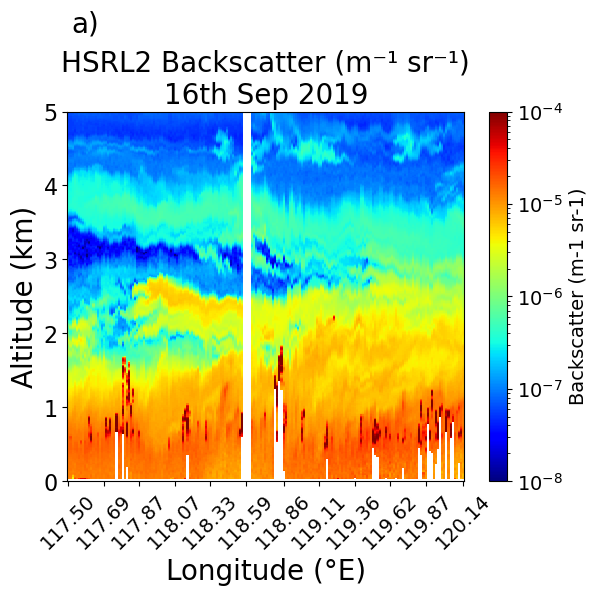

In [31]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import pandas as pd

kk = 630
ee = 820
date_index = pd.DatetimeIndex(ds_nav['Date'][kk:ee].values)
lon_vals = df_nav_['lon'].values[kk:ee]

fig, ax = plt.subplots()
ax.text(0.01, 1.2, f'a)', transform=ax.transAxes,
            fontsize=20,  va='bottom', ha='left')

c = ax.pcolormesh(
    date_index,
    ds['Altitude'][0, :].values / 1000,
    ds['532_bsc'][kk:ee, :].T / 1000,
    norm=mcolors.LogNorm(vmin=1E-8, vmax=1E-4),
    cmap='jet'
)

tick_indices = np.linspace(0, len(date_index) - 1, num=12, dtype=int)  # Adjust num for desired tick count
tick_positions = date_index[tick_indices]
tick_labels = [f"{lon_vals[i]:.2f}" for i in tick_indices]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=45, fontsize=14)
ax.set_xlabel('Longitude (°E)', fontsize=20)

plt.yticks(fontsize=16)
plt.ylim(0, 5)
cbar = plt.colorbar(c)
cbar.set_label('Backscatter (m-1 sr-1)', fontsize=14)
cbar.ax.tick_params(labelsize=14)    

plt.title(f'HSRL2 Backscatter (m⁻¹ sr⁻¹)\n16th Sep 2019', fontsize=20)
plt.ylabel('Altitude (km)', fontsize=20)
plt.savefig(f'img/Figure8_AMSPaper.png', dpi=300, bbox_inches='tight')
